# WSI Lab07 - Naiwny klasyfikator Bayesa
## Filip Ryniewicz

Zaimplementowałem naiwny klasyfikator Bayesa do klasyfikacji binarnej. Przetestowałem jego działanie do klasyfikacji na zbiorze danych do rozpoznawania chorób układu krwionośnego u pacjentów. Badałem skuteczność korzystając z k-krotnej walidacji krzyżowej

## Wykres skuteczności modelu z k-krotnej walidacji

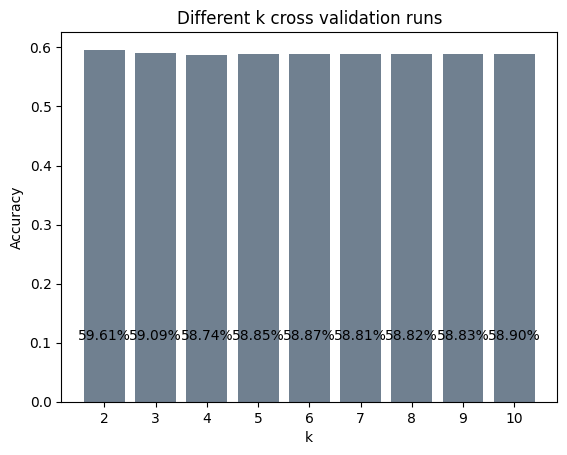

In [1]:
from report_utils import plot_k_cross_val
from utils import read_from_csv

X, y = read_from_csv('cardio_train.csv')
plot_k_cross_val(X, y, [2, 3, 4, 5, 6, 7, 8, 9, 10])

Wykres jest dla mnie dosyć zadziwiający. Przy 2-krotnej walidacji model uczy się tylko na 50% danych, a przy 10-krotnej walidacji na aż 90% danych. Wydawałoby się, że model uczący się na dużo większej ilości danych, będzie przewidywał z dużo większą skutecznością, lecz z jakiegoś powodu tak się nie dzieje. Również uważam, że skuteczność ok. 59% nie jest zadowalająca, szczególnie biorąc pod uwagę to, że inne klasyfikatory osiągają skuteczność w granicach 80% (np. ID3). Możliwe, że 50% danych dla datasetu mającego 70 tysięcy rekordów jest wystarczające do nauczenia modelu. W każdym razie, wydaje mi się, że 10-krotna walidacja lepiej przedstawia faktyczną skuteczność, osiąganą przez model, ponieważ uśrednia otrzymaną skuteczność z większej ilości wywołań.

## Wykres skuteczności modelu z różnymi podziałami na zbiory trenujący i testowy

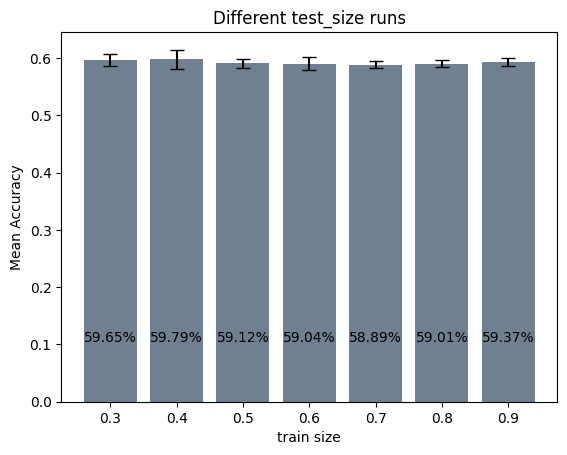

In [1]:
from report_utils import plot_train_test
from utils import read_from_csv

X, y = read_from_csv('cardio_train.csv')
plot_train_test(X, y)

Znowu, skuteczność modelu jest ok. 59% niezależnie od tego na jakiej porcji danych się uczył. Znaczy to, że model nauczony na stosunkowo małej ilości danych będzie sprawował się z taką samą skutecznością, jak model uczony dużo dłużej. Może to być przydatne do problemów, do których nie mamy dużej ilości danych, ograniczone zasoby lub ograniczony czas na uczenie.

## Podsumowanie

### Wnioski odnośnie Naiwnego klasyfikatora Bayesa
Naiwny klasyfikator Bayesa nie radzi sobie najlepiej z wykrywaniem chorób układu krwionośnego. Może to wynikać z tego, że model ten zakłada, że cechy są od siebie niezależne, co raczej nie jest prawidłowym założeniem do badania ludzkiego ciała. Brak hiperparametrów wpływa na to, że nie da się lepiej dostosować modelu do danego problemu. Z drugiej strony, model uczy się bardzo szybko, nawet dla dużej ilości danych trenujących.

### Metody badania skuteczności
Badałem skuteczność modelu korzystając z k-krotnej walidacji oraz dzielenia datasetu na set trenujący i testowy i uśredniania wyniku z wielu iteracji. Obie te metody w podobny sposób pokazują skuteczność modelu. K-krotna walidacja krzyżowa jest bardziej deterministyczna (dla danego k - podział na zbiory testowe i trenujące zawsze będzie taki sam). Drugi sposób natomiast opiera się trochę bardziej na losowości - dzielenie zbioru na trenujący i testowy za pomocą metody `train_test_split()` dostępnej w sklearn. 
Wydaje mi się, że druga metoda ma szansę trochę bardziej przebadać możliwe podziały na zbiory trenujące i testowe, co może skutkować lepszym zobrazowaniem faktycznej skuteczności modelu.